In [1]:
import torch
x = torch.empty(2, 3)
print(x)

tensor([[-1.6339e+17,  1.0870e-19, -1.6338e+17],
        [-1.0870e-19, -1.6339e+17, -3.6990e+19]])


In [2]:
x = torch.rand(2, 3)
print(x)

tensor([[0.5831, 0.6992, 0.9188],
        [0.9686, 0.5431, 0.4877]])


In [3]:
x = torch.zeros(2, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0]])


In [5]:
x = torch.tensor([[5, 5, 3], [2, 2, 5]])
print(x)

tensor([[5, 5, 3],
        [2, 2, 5]])


In [6]:
x = x.new_ones(2, 3)
print(x)

tensor([[1, 1, 1],
        [1, 1, 1]])


In [7]:
x = torch.rand_like(x, dtype=torch.float)
print(x)

tensor([[0.6096, 0.8882, 0.8294],
        [0.3682, 0.1706, 0.7608]])


In [10]:
print(x.size())
print(x.shape)

torch.Size([2, 3])
torch.Size([2, 3])


In [12]:
x = torch.rand(2, 3)
y = torch.rand(2, 3)
print(x)
print(y)
print(x + y)

tensor([[0.7645, 0.6439, 0.2719],
        [0.5941, 0.4194, 0.3230]])
tensor([[0.8693, 0.0487, 0.9718],
        [0.9983, 0.7449, 0.7045]])
tensor([[1.6338, 0.6926, 1.2436],
        [1.5924, 1.1644, 1.0275]])


In [18]:
print(x)
print(y)
print(torch.add(x, y))

tensor([[0.7645, 0.6439, 0.2719],
        [0.5941, 0.4194, 0.3230]])
tensor([[0.8693, 0.0487, 0.9718],
        [0.9983, 0.7449, 0.7045]])
tensor([[1.6338, 0.6926, 1.2436],
        [1.5924, 1.1644, 1.0275]])


In [20]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.7645, 0.6439, 0.2719],
        [0.5941, 0.4194, 0.3230]])
tensor([[0.8693, 0.0487, 0.9718],
        [0.9983, 0.7449, 0.7045]])
tensor([[1.6338, 0.6926, 1.2436],
        [1.5924, 1.1644, 1.0275]])


In [22]:
y = x[0, :]
print(y)
y += 1
print(y)
print(x[0, :])

tensor([1.7645, 1.6439, 1.2719])
tensor([2.7645, 2.6439, 2.2719])
tensor([2.7645, 2.6439, 2.2719])


In [36]:
y = x.view(6)
z = x.view(3, 2)
print(x.size(), y.size(), z.size())
print(x, y, z)

torch.Size([2, 3]) torch.Size([6]) torch.Size([3, 2])
tensor([[2.7645, 2.6439, 2.2719],
        [0.5941, 0.4194, 0.3230]]) tensor([2.7645, 2.6439, 2.2719, 0.5941, 0.4194, 0.3230]) tensor([[2.7645, 2.6439],
        [2.2719, 0.5941],
        [0.4194, 0.3230]])


In [37]:
x_cp = x.clone().view(6)
x -= 1
print(x)
print(x_cp)

tensor([[ 1.7645,  1.6439,  1.2719],
        [-0.4059, -0.5806, -0.6770]])
tensor([2.7645, 2.6439, 2.2719, 0.5941, 0.4194, 0.3230])


In [42]:
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


In [43]:
a = torch.ones(3)
b = a.numpy()
print(a, b)

tensor([1., 1., 1.]) [1. 1. 1.]


In [45]:
a += 1
print(a, b)
b += 1
print(a, b)

tensor([3., 3., 3.]) [3. 3. 3.]
tensor([4., 4., 4.]) [4. 4. 4.]


In [49]:
import numpy as np
a = np.ones(3)
b = torch.from_numpy(a)
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

[1. 1. 1.] tensor([1., 1., 1.], dtype=torch.float64)
[2. 2. 2.] tensor([2., 2., 2.], dtype=torch.float64)
[3. 3. 3.] tensor([3., 3., 3.], dtype=torch.float64)


In [50]:
c = torch.tensor(a)
a += 1
print(a, c)

[4. 4. 4.] tensor([3., 3., 3.], dtype=torch.float64)


In [51]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

tensor([[2, 3]], device='cuda:0')
tensor([[2., 3.]], dtype=torch.float64)


In [53]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None


In [54]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [55]:
z = y * y * 3
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [58]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [60]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [64]:
out2 = x.sum()
out2.backward()
print(x.grad)

tensor([[8.5000, 8.5000],
        [8.5000, 8.5000]])


In [68]:
out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])


In [69]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = 2 * x
z = y.view(2, 2)
print(z)

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward0>)


In [70]:
v = torch.tensor([[1.0, 0.1], [0.01, 0.001]], dtype=torch.float)
z.backward(v)
print(x.grad)

tensor([2.0000, 0.2000, 0.0200, 0.0020])


In [71]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [73]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=float)

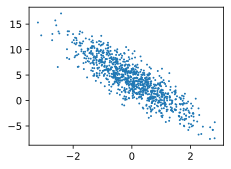

In [135]:
import matplotlib_inline.backend_inline
def set_figsize(ipython_format, figsize=(3.5, 2.5)):
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = figsize

set_figsize('svg')
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [99]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield features.index_select(0, j), labels.index_select(0, j)

In [92]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [93]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [94]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [96]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size()))**2/2

In [97]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [100]:
lr = 0.03
num_epochs = 3
batch_size = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.042626
epoch 2, loss 0.000161
epoch 3, loss 0.000049


In [101]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9997],
        [-3.3996]], requires_grad=True)
4.2 
 tensor([4.1990], requires_grad=True)


In [103]:
lr = 0.03
import torch.utils.data as Data
batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 把 dataset 放入 DataLoader
data_iter = Data.DataLoader(
dataset=dataset, # torch TensorDataset format
batch_size=batch_size, # mini batch size
shuffle=True, # 是否打乱数据 (训练集一般需要进行打乱)
num_workers=0, # 多线程来读数据，注意在Windows下需要设置为0
)

In [120]:
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)

# forward 定义前向传播
def forward(self, x):
    y = self.linear(x)
    return y

from collections import OrderedDict
net = nn.Sequential(OrderedDict([
('linear', nn.Linear(num_inputs, 1))
]))

In [121]:
from torch.nn import init
init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0) #也可以直接修改bias的data：net[0].bias.data.fill_(0)

Parameter containing:
tensor([0.], requires_grad=True)

In [122]:
loss = nn.MSELoss()

In [123]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.03) #梯度下降的学习率指定为0.03
# 可以为不同的子网络设置不同学习率
# optimizer =optim.SGD([
# # 如果不指定学习率，则用默认的最外层学习率
# {'params': net.subnet1.parameters()}, # lr=0.03
# {'params': net.subnet2.parameters(), 'lr': 0.01}
# ], lr=0.03)

In [124]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000184
epoch 2, loss: 0.000080
epoch 3, loss: 0.000027
